# **Import Libaray**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **importing Dataset**

In [2]:
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe().round(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


# **Data Cleaning & Pre-Processing**

Dealing with Missing Data

In [5]:
titanic.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

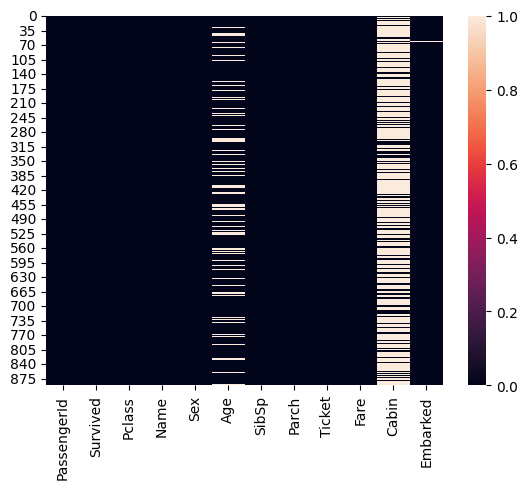

In [6]:
sns.heatmap(titanic.isna())

In [7]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())

<Axes: >

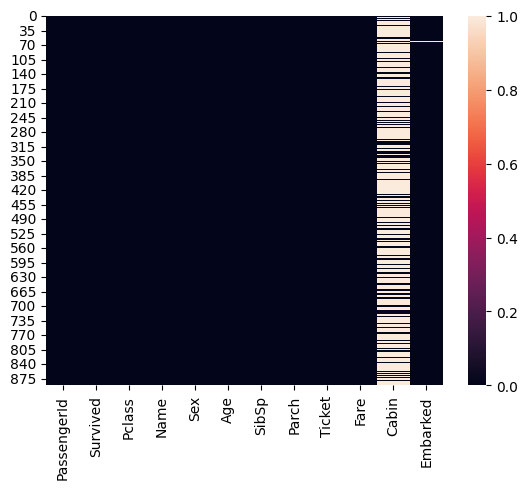

In [8]:
sns.heatmap(titanic.isna())

In [9]:
titanic.drop('Cabin',axis=1,inplace=True)

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Converting Categorical Features

In [11]:
titanic['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [12]:
titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [13]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True,dtype=int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [14]:
embarked = pd.get_dummies(titanic['Embarked'],dtype=int)
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [15]:
titanic=pd.concat([titanic,sex,embarked],axis=1)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,0,1,0,0


In [16]:
titanic.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
titanic.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
5,0,3,29.699118,0,0,8.4583,1,0,1,0
6,0,1,54.000000,0,0,51.8625,1,0,0,1
7,0,3,2.000000,3,1,21.0750,1,0,0,1
8,1,3,27.000000,0,2,11.1333,0,0,0,1
9,1,2,14.000000,1,0,30.0708,0,1,0,0


In [17]:
titanic.rename(columns={'male':'Gender'},inplace=True)
titanic.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
5,0,3,29.699118,0,0,8.4583,1,0,1,0
6,0,1,54.000000,0,0,51.8625,1,0,0,1
7,0,3,2.000000,3,1,21.0750,1,0,0,1
8,1,3,27.000000,0,2,11.1333,0,0,0,1
9,1,2,14.000000,1,0,30.0708,0,1,0,0


# **Exploratory Data Analysis**

<ipython-input-18-d2d414645835>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=titanic,palette='pastel')


<Axes: xlabel='Survived', ylabel='count'>

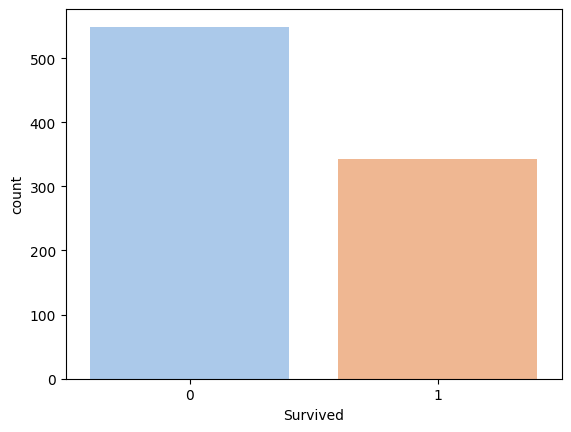

In [18]:
sns.countplot(x='Survived',data=titanic,palette='pastel')

<Axes: xlabel='Survived', ylabel='count'>

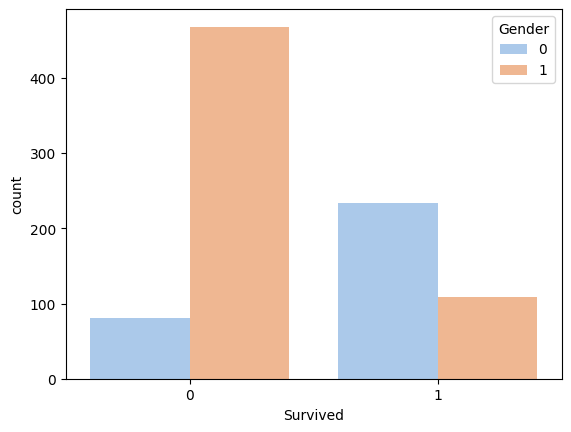

In [19]:
sns.countplot(x='Survived',data=titanic,hue='Gender',palette='pastel')

<Axes: >

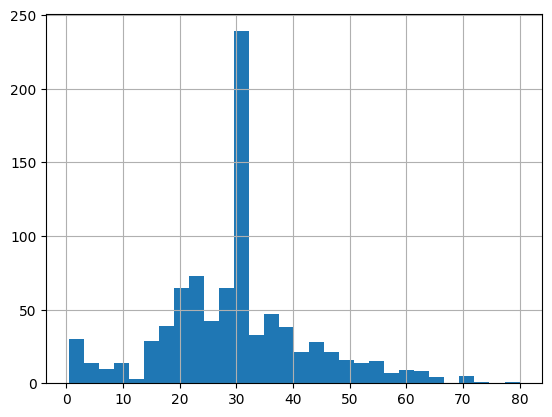

In [20]:
titanic['Age'].hist(bins=30)

<Axes: >

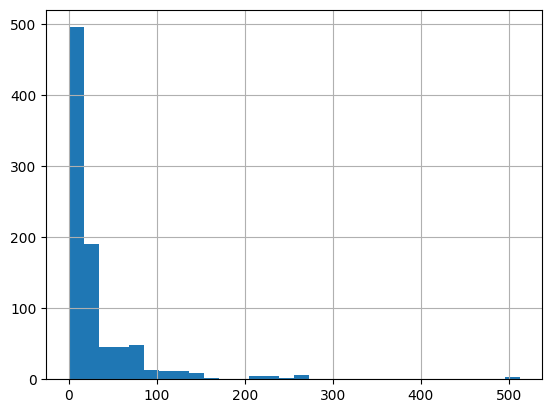

In [21]:
titanic['Fare'].hist(bins=30)

## **Building Model**

# Train / Test Split Data

In [22]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [23]:
x

,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,26.000000,0,0,7.9250,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0,1
4,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,0,1
887,1,19.000000,0,0,30.0000,0,0,0,1
888,3,29.699118,1,2,23.4500,0,0,0,1
889,1,26.000000,0,0,30.0000,1,1,0,0


In [24]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.shape

(712, 9)

In [28]:
x_test.shape

(179, 9)

In [29]:
y_train.shape

(712,)

In [30]:
y_test.shape

(179,)

# Model Training and Predicting

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

In [32]:
algorithms = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC()
]

accuracy_list = []
f1_list = []

In [33]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_list.append(accuracy)
    f1_list.append(f1)

    print(f"The Accuracy of the {model.__class__.__name__}: {accuracy:.4f}")
    print(f"The F1-Score of the {model.__class__.__name__}: {f1:.4f}")
    print("\n")

In [34]:
for model in algorithms:
    evaluate_model(model, x_train, x_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Accuracy of the LogisticRegression: 0.8045
The F1-Score of the LogisticRegression: 0.7552


The Accuracy of the RandomForestClassifier: 0.8101
The F1-Score of the RandomForestClassifier: 0.7639


The Accuracy of the GradientBoostingClassifier: 0.8101
The F1-Score of the GradientBoostingClassifier: 0.7536


The Accuracy of the SVC: 0.6592
The F1-Score of the SVC: 0.3838




In [35]:
results = pd.DataFrame({
    'Model': [model.__class__.__name__ for model in algorithms],
    'Accuracy': accuracy_list,
    'F1-Score': f1_list
})

print("\nSummary of Results:")
print(results)


Summary of Results:
                        Model  Accuracy  F1-Score
0          LogisticRegression  0.804469  0.755245
1      RandomForestClassifier  0.810056  0.763889
2  GradientBoostingClassifier  0.810056  0.753623
3                         SVC  0.659218  0.383838


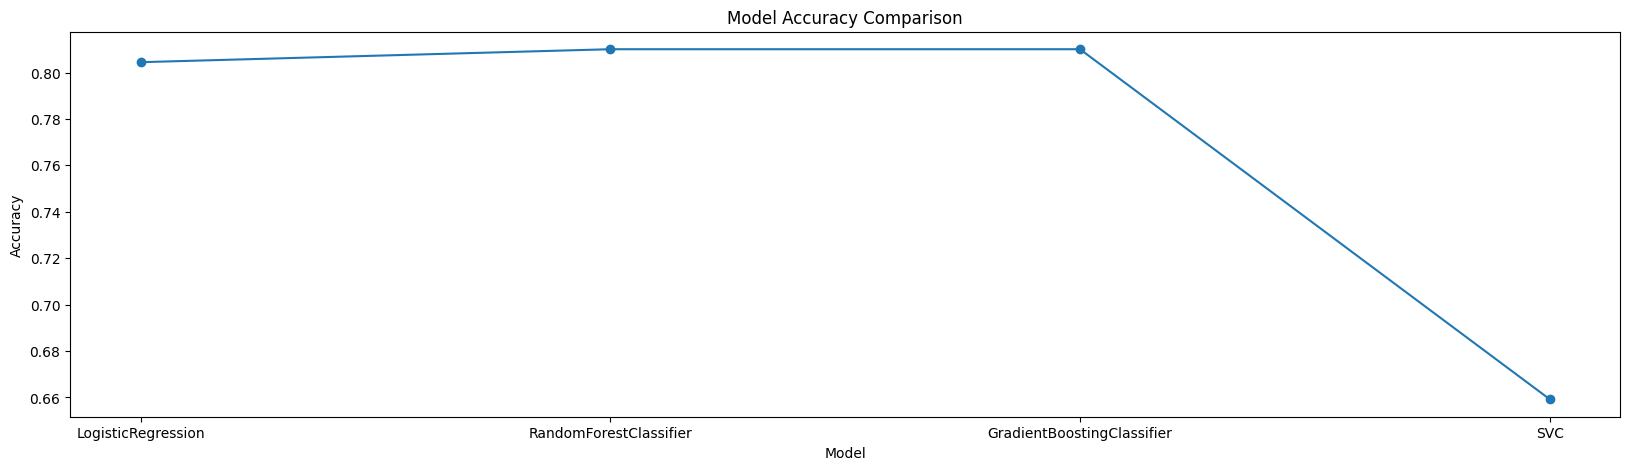

In [45]:
fig, sx = plt.subplots(figsize=(20,5))
plt.plot(results['Model'], results['Accuracy'], label='Accuracy', marker='o')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

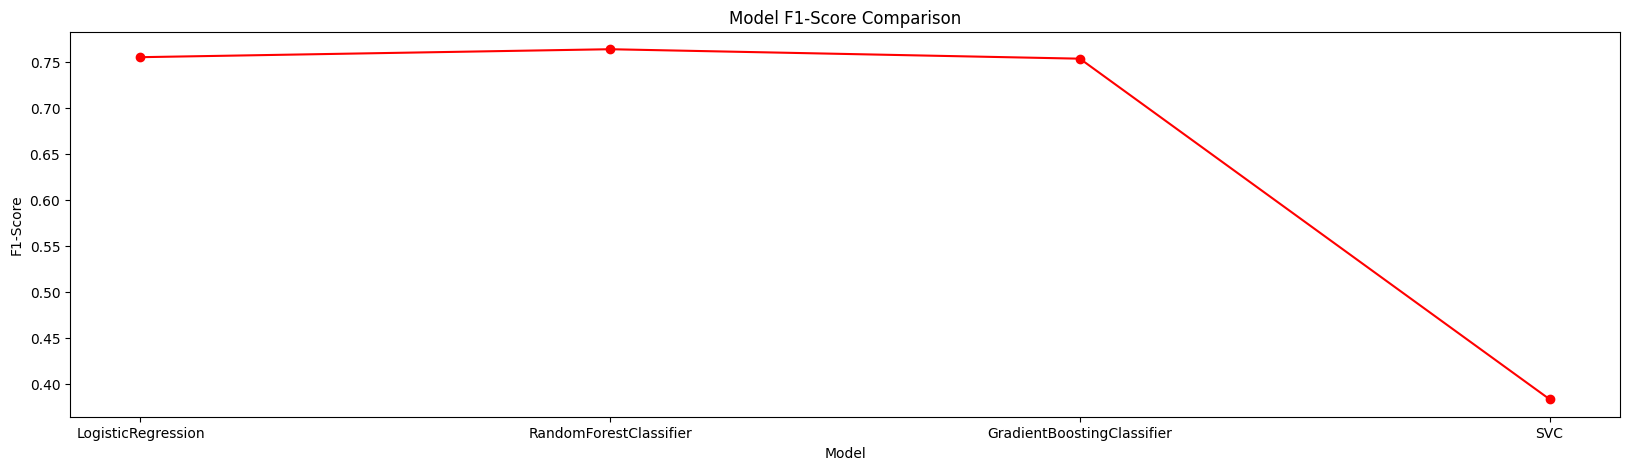

In [46]:
fig, sx = plt.subplots(figsize=(20,5))
plt.plot(results['Model'], results['F1-Score'], label='F1-Score', marker='o', c='r')
plt.title('Model F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.show()